In [1]:
"""Import useful functions"""
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier as knn
"""set random seed"""
np.random.seed(0)

In [2]:
"""Makes a function to plot the results with different icons depending on whether their binary label is 0 or 1. blp = Binary Label Plotter"""
def blp(X,y):
    
    length = np.size(X,0)
    I0=[i for i in range(length) if y[i]==0]
    I1=[i for i in range(length) if y[i]==1]

    plt.plot(X[I0,0],X[I0,1],'d',label='class 0')
    plt.plot(X[I1,0],X[I1,1],'x',label='class 1')
    plt.legend()
    plt.title('classification data')
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    plt.show()

In [3]:
"""2a. Write a function that randomly generate linearly separable data and plot it."""
def linearlySeparableData(n):
    OFM = np.random.rand(n,2)
    Labels = np.zeros(shape = (n,1))

    for i in range(n):
        if OFM[i,1] > 0.5:
            Labels[i] = 1
        
    return OFM, Labels;

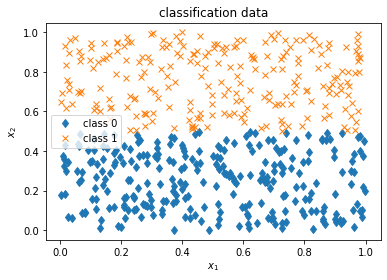

In [4]:
[X, y] = linearlySeparableData(500)
blp(X,y)

In [5]:
"""2b. Makes some data that is separable but not linearly separable."""
def separableData(n):
    OFM = np.random.rand(n,2)
    Labels = np.zeros(shape = (n,1))

    for i in range(n):
        if (OFM[i,0]**2 + OFM[i,1]**2) > 0.5:
            Labels[i] = 1
        
    return OFM, Labels;

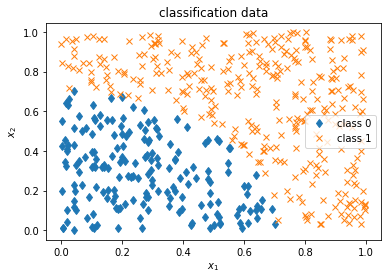

In [6]:
[X, y] = separableData(500)
blp(X,y)

In [7]:
"""2c. Makes some data that is almost separable but not quite."""
def nearlySeparableData(n):
    OFM = np.random.rand(n,2)
    Labels = np.zeros(shape = (n,1))

    for i in range(n):
        if OFM[i,1] > 0.5+np.random.uniform(-0.1,0.1):
            Labels[i] = 1
        
    return OFM, Labels;

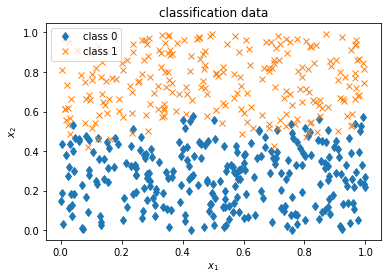

In [8]:
[X, y] = nearlySeparableData(500)
blp(X,y)

In [9]:
"""2c. Makes some data that is far from separable."""
def inseparableData(n):
    OFM = np.random.rand(n,2)
    Labels = np.random.randint(low = 2, size = (n,1))
        
    return OFM, Labels;

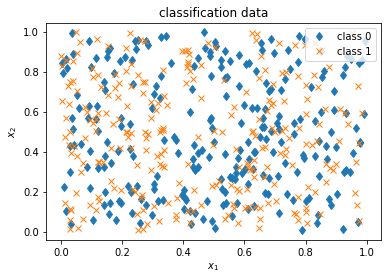

Good luck finding a function for this one!


In [10]:
[X, y] = inseparableData(500)
blp(X,y)

print("Good luck finding a function for this one!")

In [1]:
"""3. Takes a model with a predict method and plots a contour plot of said prediction"""

def contourPlotter(mdl,X,y):
    mdl.fit(X,y)
    
    length = np.size(X,0)
    I0=[i for i in range(length) if y[i]==0]
    I1=[i for i in range(length) if y[i]==1]
    
    res=100
    xrange=np.linspace(0,1,res)
    yrange=np.linspace(0,1,res)
    P=np.empty((res,res))
    for i in range(res):
        for j in range(res):
            P[i,j]=mdl.predict(np.array([xrange[i],yrange[j]]).reshape(1,-1))
    plt.contourf(xrange,yrange,P.T)
    plt.plot(X[I0,0],X[I0,1],'x',label='class 0')
    plt.plot(X[I1,0],X[I1,1],'d',label='class 1')
    plt.legend()
    plt.title('prediction for mdl')
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


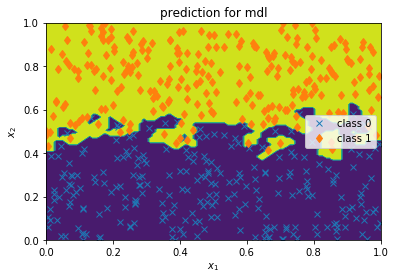

In [12]:
[X, y] = nearlySeparableData(500)
mdl = knn(n_neighbors = 1)
contourPlotter(mdl,X,y)

In [13]:
"""Takes a model with a fit and predict method, as well as a binary classification data set,
    Randomly splits the model into training set and a test set,
    Trains the model on the training data and checks itself against the test set
    Then reports the accuracy."""
def modelTrainer(mdl,X,y,name = 'Model Being Tested'):
    
    length = np.size(X,0)
    p = np.random.permutation(length)
    length_test = int(np.floor(length*0.2))
    test = p[:length_test]
    train = p[length_test:]
    
    mdl.fit(X[train],y[train])
    test_prediction = mdl.predict(X[test])
    
    
    TP=sum(1 for i in range(length_test) if test_prediction[i]==1 and y[test[i]]==1)
    TN=sum(1 for i in range(length_test) if test_prediction[i]==0 and y[test[i]]==0)
    FP=sum(1 for i in range(length_test) if test_prediction[i]==1 and y[test[i]]==0)
    FN=sum(1 for i in range(length_test) if test_prediction[i]==0 and y[test[i]]==1)
    
    contourPlotter(mdl,X,y)
    
    print(name + ' Results')
    print('test_accuracy='+str((TP+TN)/(TP+TN+FP+FN)))
    print('test_precision='+str(TP/(TP+FP)))
    print('test_recall='+str(TP/(TP+FN)))
    print('test_F1='+str(2*TP/(2*TP+FP+FN)))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  del sys.path[0]
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


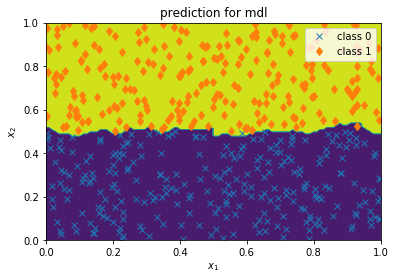

Linearly separable data Results
test_accuracy=0.99
test_precision=0.9824561403508771
test_recall=1.0
test_F1=0.9911504424778761


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  del sys.path[0]
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


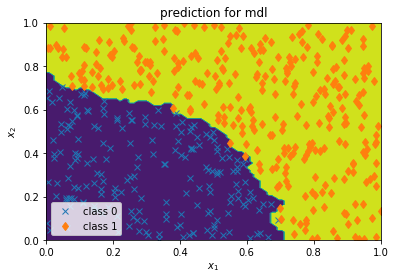

Separable data Results
test_accuracy=0.99
test_precision=1.0
test_recall=0.9814814814814815
test_F1=0.9906542056074766


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  del sys.path[0]
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


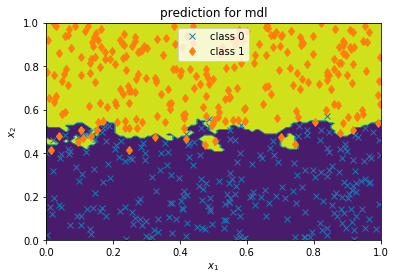

Almost separable data Results
test_accuracy=0.94
test_precision=1.0
test_recall=0.8867924528301887
test_F1=0.94


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  del sys.path[0]
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


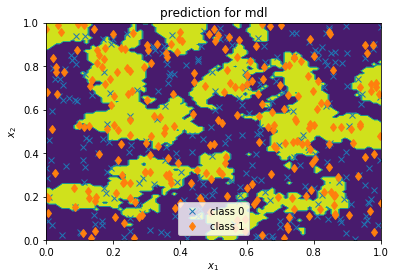

Not at all separable data Results
test_accuracy=0.51
test_precision=0.4666666666666667
test_recall=0.2978723404255319
test_F1=0.36363636363636365


In [14]:
[X, y] = linearlySeparableData(500)
mdl = knn(n_neighbors = 3)
modelTrainer(mdl,X,y,'Linearly separable data')

[X, y] = separableData(500)
mdl = knn(n_neighbors = 3)
modelTrainer(mdl,X,y,'Separable data')

[X, y] = nearlySeparableData(500)
mdl = knn(n_neighbors = 3)
modelTrainer(mdl,X,y,'Almost separable data')

[X, y] = inseparableData(500)
mdl = knn(n_neighbors = 8)
modelTrainer(mdl,X,y,'Not at all separable data')